In [52]:
import json as json
import pprint as pp
from operator import itemgetter

All submissions < 4 seconds are bogus since the attack starts at 4

In [53]:
all_submissions=[]
no_time=[]
results=[]
fast_submit=[]


with open("processed_results.txt") as f:
        all_submissions = json.load(f, encoding='utf8')

results = [ r for r in all_submissions if r['counters']['all_changes'] > 0]
no_ops = [ r for r in all_submissions if r['counters']['all_changes'] == 0]
fast_submit=[ r for r in all_submissions if r['time'] < 4 ]

results = [r for r in results if r not in fast_submit and r['time']] #last one is a duplicate same user


results = sorted(results, key=itemgetter('rev'), reverse=True) #sort results based on revenue

print("all:", len(all_submissions))

print("results:", len(results))
print("No changes applied:",len(no_ops))

all: 48
results: 36
No changes applied: 11


We have only 10 valid results that recorded the runtime.

Now we compare the results with the base topologies and see what has changed:

In [54]:
def make_latex_table(net_type):
    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
        
    sep = " & "
    newline = "\\\\ \\hline"
    
    for r in res:
        r['ranks'] = r['cost_ratio'] - r['rev']
    res = sorted(res, key=itemgetter('ranks'), reverse=False)
    
    for c, r in enumerate(res):
        r['rank']=c+1 


    print("rank & recovery & cost &  changes & state & rate up & rate down & filter \\\ \\hline")
    for r in res:
            #print(r['_0_init'], end = sep)
            #print(str(r['user']), end = sep)
            #print(str(r['time']), end = sep)
            print(r['rank'], end = sep)
            print(str(r['rev']), end = sep)
            print(str(r['cost_ratio']), end = sep)
            r = r['counters']
            print(r['all_changes'], end = sep)
            print(r['state_changes'], end = sep)
            print(r['rateup'], end = sep)
            print(r['ratedown'], end = sep)
            print(r['filter_changes'], end = " ")
            print(newline)

In [55]:
make_latex_table(1)

rank & recovery & cost &  changes & state & rate up & rate down & filter \\ \hline
1 & 92 & 103 & 20 & 0 & 12 & 8 & 0 \\ \hline
2 & 91 & 112 & 14 & 2 & 6 & 2 & 4 \\ \hline
3 & 87 & 108 & 3 & 0 & 0 & 0 & 3 \\ \hline
4 & 79 & 100 & 6 & 4 & 0 & 0 & 2 \\ \hline
5 & 98 & 126 & 16 & 2 & 6 & 0 & 8 \\ \hline
6 & 96 & 127 & 16 & 0 & 2 & 4 & 10 \\ \hline
7 & 99 & 132 & 16 & 0 & 4 & 2 & 10 \\ \hline
8 & 67 & 100 & 6 & 2 & 0 & 2 & 2 \\ \hline
9 & 78 & 114 & 10 & 0 & 10 & 0 & 0 \\ \hline
10 & 96 & 133 & 16 & 0 & 8 & 0 & 8 \\ \hline
11 & 64 & 103 & 11 & 4 & 2 & 2 & 3 \\ \hline
12 & 85 & 129 & 16 & 0 & 10 & 0 & 6 \\ \hline
13 & 89 & 138 & 16 & 0 & 4 & 0 & 12 \\ \hline
14 & 61 & 119 & 16 & 2 & 6 & 2 & 6 \\ \hline
15 & 27 & 94 & 8 & 0 & 2 & 6 & 0 \\ \hline
16 & 54 & 123 & 12 & 2 & 2 & 0 & 8 \\ \hline
17 & 94 & 164 & 22 & 0 & 0 & 0 & 22 \\ \hline
18 & 33 & 103 & 8 & 2 & 2 & 2 & 2 \\ \hline
19 & 51 & 126 & 14 & 0 & 10 & 0 & 4 \\ \hline


In [56]:
make_latex_table(2)

rank & recovery & cost &  changes & state & rate up & rate down & filter \\ \hline
1 & 149 & 98 & 12 & 0 & 0 & 10 & 2 \\ \hline
2 & 163 & 119 & 6 & 0 & 2 & 0 & 4 \\ \hline
3 & 162 & 119 & 6 & 0 & 2 & 0 & 4 \\ \hline
4 & 161 & 119 & 6 & 0 & 2 & 0 & 4 \\ \hline
5 & 138 & 97 & 6 & 0 & 0 & 4 & 2 \\ \hline
6 & 153 & 123 & 6 & 0 & 0 & 0 & 6 \\ \hline
7 & 149 & 121 & 8 & 0 & 4 & 0 & 4 \\ \hline
8 & 135 & 121 & 30 & 4 & 20 & 6 & 0 \\ \hline
9 & 99 & 96 & 10 & 4 & 4 & 2 & 0 \\ \hline
10 & 130 & 130 & 8 & 0 & 0 & 0 & 8 \\ \hline
11 & 101 & 103 & 4 & 2 & 0 & 0 & 2 \\ \hline
12 & 109 & 115 & 8 & 2 & 2 & 0 & 4 \\ \hline
13 & 96 & 106 & 12 & 4 & 2 & 2 & 4 \\ \hline
14 & 146 & 165 & 18 & 0 & 2 & 0 & 16 \\ \hline
15 & 104 & 123 & 6 & 0 & 0 & 0 & 6 \\ \hline
16 & 104 & 123 & 18 & 0 & 4 & 7 & 7 \\ \hline
17 & 54 & 103 & 4 & 2 & 0 & 0 & 2 \\ \hline


In [57]:
%matplotlib inline

def draw_change_plot(net_type, filename=None):
    import matplotlib.pyplot as plt
    from numpy import nan
    
    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
        
    x = [r['rev'] for r in res]
    y = [r['counters']['all_changes'] or nan for r in res] 
    y1 = [r['counters']['state_changes'] or nan for r in res] 
    y2 = [r['counters']['filter_changes'] or nan for r in res] 
    y3 = [r['counters']['rateup'] or nan for r in res] 
    y4 = [r['counters']['ratedown'] or nan for r in res]
    
    size = 60
    colors = list("rgbcmyk")
    colors.pop()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_xlabel('revenue recovered in %')
    ax.set_ylabel('amount of changes')
    plt.scatter(x, y, c=colors.pop(), s=size, marker='o')
    plt.scatter(x,y1 ,color=colors.pop(), s=40, marker='s' )
    plt.scatter(x,y2,color=colors.pop(), s=40, marker='*' )
    plt.scatter(x,y3,color=colors.pop(), s=40, marker='^')
    plt.scatter(x,y4,color=colors.pop(), s=40, marker='v')
    keys = ["all_changes", "state_changes", "filter_changes", "rateup_changes", "ratedown_changes"]    
    plt.legend(['total','state','filter', 'up', 'down'], loc=2, bbox_to_anchor=(1.01,1) , borderaxespad=0.10)
    if filename: 
        plt.savefig(filename, format='pdf', transparent=True, bbox_inches = 'tight')
    plt.show()

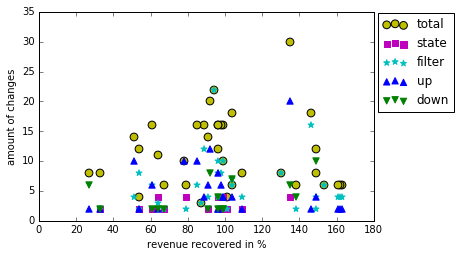

In [58]:
%matplotlib inline  
draw_change_plot(0, "rev_change_combined.pdf")

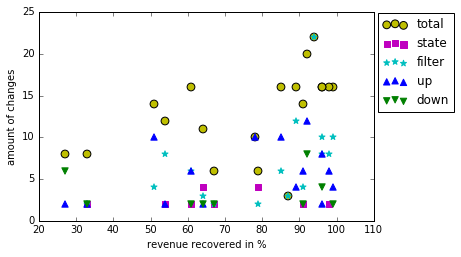

In [59]:
%matplotlib inline  
draw_change_plot(1,"rev_change_s1.pdf")

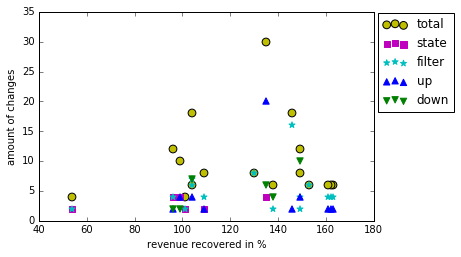

In [60]:
%matplotlib inline  
draw_change_plot(2,"rev_change_s2.pdf")

In [61]:
%matplotlib inline  
import matplotlib.pyplot as plt
from numpy import nan

def draw_rev_plot(net_type, filename=None):
    markers='o'

    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
    
    res=[r for r in results if r['net_type'] == 1]
    x = [r['rev'] for r in res]
    y = [r['cost_ratio'] for r in res]

    res=[r for r in results if r['net_type'] == 2]
    x2 = [r['rev'] for r in res]
    y2 = [r['cost_ratio'] for r in res]
    
    size = 60
    colors = list("rgbcmyk")
    colors.pop()
    import itertools
    marker = itertools.cycle(markers)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_xlabel('revenue compared to baseline %')
    ax.set_ylabel('costs compared to baseline in %')
    plt.scatter(x, y, c=colors.pop(), s=size, marker='o')
    plt.scatter(x2, y2, c=colors.pop(), s=size, marker='s')
    plt.legend(['scenario 1', 'scenario 2'], loc=2, bbox_to_anchor=(1.01,1) , borderaxespad=0.10)

    if filename: 
        plt.savefig(filename, format='pdf', transparent=True, bbox_inches = 'tight')
    plt.show()

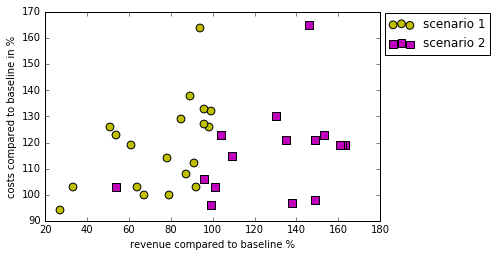

In [62]:
draw_rev_plot(0,"rev_costs_combined.pdf")

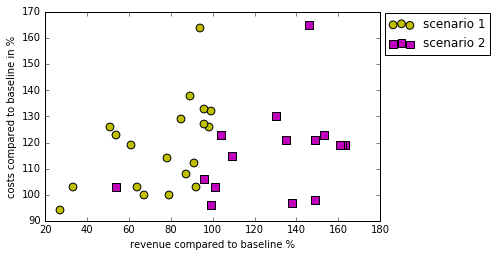

In [63]:
draw_rev_plot(1,"rev_costs_s1.pdf")

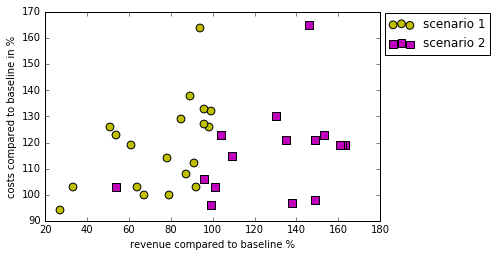

In [64]:
draw_rev_plot(2,"rev_costs_s1.pdf")

In [65]:
import numpy
from scipy.stats import pearsonr, f_oneway, linregress

res=[r for r in results if r['net_type'] == 1]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation 1:", pearsonr(list1, list2))


res=[r for r in results if r['net_type'] == 2]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation 2:", pearsonr(list1, list2))

res=[r for r in results]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation total:", pearsonr(list1, list2))

#res=[r for r in results]
res=[r for r in results if r['net_type'] == 2]
list1 = [float(r['revenue']) for r in res]
list2 = [r['counters']['filter_changes'] for r in res]

correlation 1: (0.51085907897094629, 0.025404248614261816)
correlation 2: (0.35577258599329892, 0.16106070016528645)
correlation total: (0.25350195594950686, 0.13574538904060257)


In [66]:
from results import *
from pprint import pprint
samples1=[]
samples2=[]
samples=samples1

for result in results:
    if 'samples' in result.keys():
        if result['_0_init'] == "2015-11-18T16:19:42.764Z":
            samples=samples2
        samples += result['samples']
print(len(samples))

samples1 = [float(s) for s in samples1]
samples2 = [float(s) for s in samples2 if int(float(s)) > 0]


234


187.513379


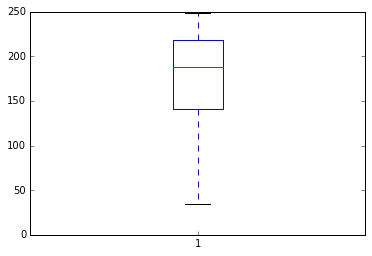

153.06495


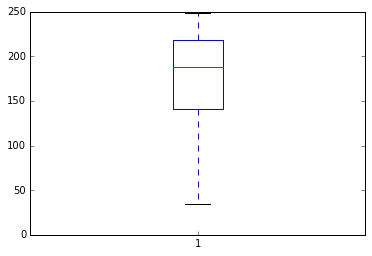

In [67]:
plt.figure()
from statistics import median, median_high
print(median_high(samples1))
plt.boxplot(samples1)
plt.show()
print(median(samples2))
plt.figure()
plt.boxplot(samples1)
plt.show()